In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [2]:
# grabbing our cleaned train and test data (test data given to us so no split) 
away = pd.read_csv('train_merged_away.csv')
home = pd.read_csv('train_merged_home.csv')
result = pd.read_csv('Y_train_1rknArQ.csv')
test_home = pd.read_csv('test_merged_home.csv')
test_away = pd.read_csv('test_merged_away.csv')
test_result = pd.read_csv('Y_test_random_sEE2QeA.csv')

In [5]:
away.shape

(12303, 1449)

In [8]:
# deciding the attributes used in the tree in deciding 
features = ['PLAYER_ACCURATE_CROSSES_season_sum_P1', 'PLAYER_ACCURATE_CROSSES_season_sum_P2', 'PLAYER_ACCURATE_CROSSES_season_sum_P3', 'PLAYER_ACCURATE_CROSSES_season_sum_P4', 'PLAYER_ACCURATE_CROSSES_season_sum_P5', 'PLAYER_ACCURATE_PASSES_5_last_match_average_P1', 'PLAYER_ACCURATE_PASSES_5_last_match_average_P3', 'PLAYER_ACCURATE_PASSES_5_last_match_average_P4', 'PLAYER_ACCURATE_PASSES_5_last_match_average_P5', 'PLAYER_ACCURATE_PASSES_season_sum_P1', 'PLAYER_ACCURATE_PASSES_season_sum_P2', 'PLAYER_ACCURATE_PASSES_season_sum_P3', 'PLAYER_ACCURATE_PASSES_season_sum_P4', 'PLAYER_ACCURATE_PASSES_season_sum_P5', 'PLAYER_AERIALS_WON_season_sum_P1', 'PLAYER_AERIALS_WON_season_sum_P2', 'PLAYER_AERIALS_WON_season_sum_P3', 'PLAYER_AERIALS_WON_season_sum_P4', 'PLAYER_AERIALS_WON_season_sum_P5', 'PLAYER_ASSISTS_season_sum_P1', 'PLAYER_ASSISTS_season_sum_P5', 'PLAYER_BIG_CHANCES_CREATED_season_sum_P5', 'PLAYER_GOALS_CONCEDED_5_last_match_average_P1', 'PLAYER_GOALS_CONCEDED_5_last_match_average_P2', 'PLAYER_GOALS_CONCEDED_5_last_match_average_P3', 'PLAYER_GOALS_CONCEDED_5_last_match_average_P4', 'PLAYER_GOALS_CONCEDED_5_last_match_average_P5', 'PLAYER_GOALS_CONCEDED_season_sum_P1', 'PLAYER_GOALS_CONCEDED_season_sum_P2', 'PLAYER_GOALS_CONCEDED_season_sum_P3', 'PLAYER_GOALS_CONCEDED_season_sum_P4', 'PLAYER_GOALS_CONCEDED_season_sum_P5', 'PLAYER_KEY_PASSES_5_last_match_average_P5', 'PLAYER_KEY_PASSES_season_sum_P1', 'PLAYER_KEY_PASSES_season_sum_P5', 'PLAYER_LONG_BALLS_WON_5_last_match_average_P3', 'PLAYER_LONG_BALLS_WON_5_last_match_average_P4', 'PLAYER_LONG_BALLS_WON_5_last_match_average_P5', 'PLAYER_MINUTES_PLAYED_5_last_match_average_P2', 'PLAYER_MINUTES_PLAYED_5_last_match_average_P3', 'PLAYER_MINUTES_PLAYED_5_last_match_average_P4', 'PLAYER_MINUTES_PLAYED_5_last_match_average_P5', 'PLAYER_MINUTES_PLAYED_season_sum_P1', 'PLAYER_MINUTES_PLAYED_season_sum_P2', 'PLAYER_MINUTES_PLAYED_season_sum_P3', 'PLAYER_MINUTES_PLAYED_season_sum_P4', 'PLAYER_MINUTES_PLAYED_season_sum_P5', 'PLAYER_PASSES_5_last_match_average_P3', 'PLAYER_PASSES_season_sum_P3', 'PLAYER_PENALTIES_MISSES_5_last_match_average_P1', 'PLAYER_PENALTIES_MISSES_5_last_match_average_P2', 'PLAYER_PENALTIES_MISSES_5_last_match_average_P3', 'PLAYER_PENALTIES_MISSES_5_last_match_average_P4', 'PLAYER_PENALTIES_MISSES_5_last_match_average_P5', 'PLAYER_PENALTIES_SAVED_5_last_match_average_P1', 'PLAYER_PENALTIES_SAVED_5_last_match_average_P2', 'PLAYER_PENALTIES_SAVED_5_last_match_average_P3', 'PLAYER_PENALTIES_SAVED_5_last_match_average_P4', 'PLAYER_PENALTIES_SAVED_5_last_match_average_P5', 'PLAYER_PENALTIES_SCORED_5_last_match_average_P1', 'PLAYER_PENALTIES_SCORED_5_last_match_average_P2', 'PLAYER_PENALTIES_SCORED_5_last_match_average_P3', 'PLAYER_PENALTIES_SCORED_5_last_match_average_P4', 'PLAYER_PENALTIES_SCORED_5_last_match_average_P5', 'PLAYER_PENALTIES_WON_5_last_match_average_P1', 'PLAYER_PENALTIES_WON_5_last_match_average_P2', 'PLAYER_PENALTIES_WON_5_last_match_average_P3', 'PLAYER_PENALTIES_WON_5_last_match_average_P4', 'PLAYER_PENALTIES_WON_5_last_match_average_P5', 'PLAYER_RATING_5_last_match_average_P1', 'PLAYER_RATING_5_last_match_average_P2', 'PLAYER_RATING_5_last_match_average_P3', 'PLAYER_RATING_5_last_match_average_P4', 'PLAYER_REDCARDS_5_last_match_average_P5', 'PLAYER_SAVES_5_last_match_average_P1', 'PLAYER_SAVES_5_last_match_average_P2', 'PLAYER_SAVES_5_last_match_average_P3', 'PLAYER_SAVES_5_last_match_average_P4', 'PLAYER_SAVES_5_last_match_average_P5', 'PLAYER_SAVES_INSIDE_BOX_5_last_match_average_P1', 'PLAYER_SAVES_INSIDE_BOX_5_last_match_average_P2', 'PLAYER_SAVES_INSIDE_BOX_5_last_match_average_P3', 'PLAYER_SAVES_INSIDE_BOX_5_last_match_average_P4', 'PLAYER_SAVES_INSIDE_BOX_5_last_match_average_P5', 'PLAYER_SHOTS_BLOCKED_5_last_match_average_P1', 'PLAYER_SHOTS_BLOCKED_5_last_match_average_P2', 'PLAYER_SHOTS_BLOCKED_5_last_match_average_P3', 'PLAYER_SHOTS_BLOCKED_5_last_match_average_P4', 'PLAYER_SHOTS_BLOCKED_5_last_match_average_P5', 'PLAYER_SHOTS_OFF_TARGET_5_last_match_average_P1', 'PLAYER_SHOTS_OFF_TARGET_5_last_match_average_P2', 'PLAYER_SHOTS_OFF_TARGET_5_last_match_average_P3', 'PLAYER_SHOTS_OFF_TARGET_5_last_match_average_P4', 'PLAYER_SHOTS_OFF_TARGET_5_last_match_average_P5', 'PLAYER_SHOTS_ON_TARGET_5_last_match_average_P1', 'PLAYER_SHOTS_ON_TARGET_5_last_match_average_P2', 'PLAYER_SHOTS_ON_TARGET_5_last_match_average_P3', 'PLAYER_SHOTS_ON_TARGET_5_last_match_average_P4', 'PLAYER_SHOTS_ON_TARGET_5_last_match_average_P5', 'PLAYER_SHOTS_TOTAL_5_last_match_average_P1', 'PLAYER_SHOTS_TOTAL_5_last_match_average_P2', 'PLAYER_SHOTS_TOTAL_5_last_match_average_P3', 'PLAYER_SHOTS_TOTAL_5_last_match_average_P4', 'PLAYER_SHOTS_TOTAL_5_last_match_average_P5', 'PLAYER_STARTING_LINEUP_5_last_match_average_P1', 'PLAYER_STARTING_LINEUP_5_last_match_average_P2', 'PLAYER_STARTING_LINEUP_5_last_match_average_P3', 'PLAYER_STARTING_LINEUP_5_last_match_average_P4', 'PLAYER_STARTING_LINEUP_5_last_match_average_P5', 'PLAYER_STARTING_LINEUP_season_sum_P1', 'PLAYER_STARTING_LINEUP_season_sum_P2', 'PLAYER_STARTING_LINEUP_season_sum_P3', 'PLAYER_STARTING_LINEUP_season_sum_P4', 'PLAYER_STARTING_LINEUP_season_sum_P5', 'PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_average_P1', 'PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_average_P2', 'PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_average_P3', 'PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_average_P4', 'PLAYER_YELLOWCARDS_season_sum_P4', 'PLAYER_YELLOWCARDS_season_sum_P5', 'TEAM_ATTACKS_5_last_match_average', 'TEAM_ATTACKS_season_sum', 'TEAM_BALL_POSSESSION_5_last_match_average', 'TEAM_BALL_SAFE_5_last_match_average', 'TEAM_BALL_SAFE_season_sum', 'TEAM_CORNERS_5_last_match_average', 'TEAM_CORNERS_season_sum', 'TEAM_DANGEROUS_ATTACKS_5_last_match_average', 'TEAM_DANGEROUS_ATTACKS_season_sum', 'TEAM_FOULS_5_last_match_average', 'TEAM_GAME_DRAW_5_last_match_average', 'TEAM_GAME_DRAW_season_sum', 'TEAM_GAME_LOST_5_last_match_average', 'TEAM_GAME_LOST_season_sum', 'TEAM_GAME_WON_5_last_match_average', 'TEAM_GAME_WON_season_sum', 'TEAM_GOALS_5_last_match_average', 'TEAM_GOALS_season_sum', 'TEAM_INJURIES_5_last_match_average', 'TEAM_OFFSIDES_5_last_match_average', 'TEAM_OFFSIDES_season_sum', 'TEAM_PASSES_5_last_match_average', 'TEAM_PASSES_season_sum', 'TEAM_PENALTIES_5_last_match_average', 'TEAM_PENALTIES_season_sum', 'TEAM_REDCARDS_5_last_match_average', 'TEAM_SAVES_5_last_match_average', 'TEAM_SAVES_season_sum', 'TEAM_SHOTS_INSIDEBOX_5_last_match_average', 'TEAM_SHOTS_INSIDEBOX_season_sum', 'TEAM_SHOTS_OFF_TARGET_5_last_match_average', 'TEAM_SHOTS_OFF_TARGET_season_sum', 'TEAM_SHOTS_ON_TARGET_5_last_match_average', 'TEAM_SHOTS_ON_TARGET_season_sum', 'TEAM_SHOTS_OUTSIDEBOX_5_last_match_average', 'TEAM_SHOTS_OUTSIDEBOX_season_sum', 'TEAM_SHOTS_TOTAL_5_last_match_average', 'TEAM_SHOTS_TOTAL_season_sum', 'TEAM_SUBSTITUTIONS_5_last_match_average', 'TEAM_SUCCESSFUL_PASSES_5_last_match_average', 'TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average', 'TEAM_SUCCESSFUL_PASSES_season_sum', 'TEAM_YELLOWCARDS_5_last_match_average', 'TEAM_YELLOWCARDS_season_sum']
result_feature = ['AWAY_WINS']

In [9]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [10]:
# predicting home wins
f1_home = []
accuracy_home = []
feature = []
y_train = result['HOME_WINS']
y_test = test_result['HOME_WINS']
for index, column in zip(range(50), features): 
    feature.append(column)
    X_train = away[feature]
    X_test = test_away[feature]
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_pred, y_test, output_dict=True)
    f1_home.append(report['1']['f1-score'])
    accuracy_home.append(report['accuracy'])

In [11]:
# predicting away wins
f1_away = []
accuracy_away = []
feature = []
y_train = result['AWAY_WINS']
y_test = test_result['AWAY_WINS']
for index, column in zip(range(50), features): 
    feature.append(column)
    X_train = home[feature]
    X_test = test_home[feature]
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_pred, y_test, output_dict=True)
    f1_away.append(report['1']['f1-score'])
    accuracy_away.append(report['accuracy'])

In [12]:
length = []
for i in range(1, 51): 
    length.append(i)

In [13]:
#print(accuracy_home)

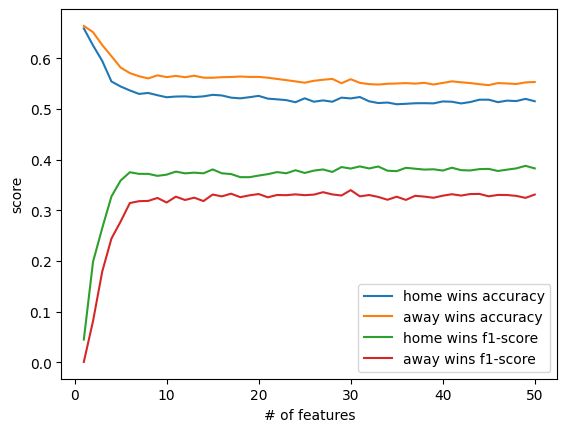

In [14]:
plt.plot(length, accuracy_home, label='home wins accuracy')
plt.plot(length, accuracy_away, label='away wins accuracy')
plt.plot(length, f1_home, label='home wins f1-score')
plt.plot(length, f1_away, label = 'away wins f1-score')
plt.xlabel('# of features')
plt.ylabel('score')
plt.legend()
plt.savefig('graph.pdf')
plt.show()

In [74]:
# this will plot the tree 
# width and height 
#plt.figure(figsize=(100, 10))
#tree.plot_tree(clf)

In [39]:
y_pred = clf.predict(X_test)

In [40]:
# 2 Attributes 
print(confusion_matrix(y_pred, y_test))

[[9588 4909]
 [7264 3607]]


In [61]:
print(classification_report(y_pred, y_test))
report = classification_report(y_pred, y_test, output_dict=True)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.66      0.80     25354
           1       0.00      0.21      0.00        14

    accuracy                           0.66     25368
   macro avg       0.50      0.44      0.40     25368
weighted avg       1.00      0.66      0.80     25368

{'0': {'precision': 0.9993472584856397, 'recall': 0.664234440324998, 'f1-score': 0.79803819362176, 'support': 25354.0}, '1': {'precision': 0.0003522780648191639, 'recall': 0.21428571428571427, 'f1-score': 0.0007033997655334115, 'support': 14.0}, 'accuracy': 0.6639861242510249, 'macro avg': {'precision': 0.4998497682752294, 'recall': 0.43926007730535616, 'f1-score': 0.3993707966936467, 'support': 25368.0}, 'weighted avg': {'precision': 0.9987959367525155, 'recall': 0.6639861242510249, 'f1-score': 0.7975981633823249, 'support': 25368.0}}


In [9]:
feature = ['PLAYER_ACCURATE_CROSSES_season_sum_P1', 'PLAYER_ACCURATE_CROSSES_season_sum_P2', 'PLAYER_ACCURATE_CROSSES_season_sum_P3', 'PLAYER_ACCURATE_CROSSES_season_sum_P4', 'PLAYER_ACCURATE_CROSSES_season_sum_P5', 'PLAYER_ACCURATE_PASSES_5_last_match_average_P1', 'PLAYER_ACCURATE_PASSES_5_last_match_average_P3', 'PLAYER_ACCURATE_PASSES_5_last_match_average_P4', 'PLAYER_ACCURATE_PASSES_5_last_match_average_P5', 'PLAYER_ACCURATE_PASSES_season_sum_P1',]
clf = tree.DecisionTreeClassifier()
y_train = result['HOME_WINS']
y_test = test_result['HOME_WINS']
X_train = away[feature]
X_test = test_away[feature]
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
report = classification_report(y_pred, y_test, output_dict=True)
print(report['1']['f1-score'])
print(report['accuracy'])
print(confusion_matrix(y_pred, y_test))

0.3697435364967293
0.521444339325134
[[9667 4856]
 [7284 3561]]
